<a href="https://colab.research.google.com/github/Jowayria-27/Artifical-Intelligence-Project/blob/main/Microsoft%20Stocks%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Artificial Intelligence Project**


## Markov Chain

In this project, we are aiming to predict stock prices fluctuations. Nowadays, millions of people invest in stocks as they are a great asset that can quickly amount to a huge sum of moeny. However, it can as quickly drop in price and almost be equal to nothing. Stock investors usually work to sell stocks when they are at their highest price and purchase stock at their lowest price in order to maximize their profit. Hence, predicting the different fluctuations states (stock increasing, decreasing, remaining stable) would help investors make better decisions and help optimize and maximize their profits. In this project, we are implementing a Markov Chain model on Microsoft's stocks for the dates ranging from April 1st, 2015 until March 31st, 2021.

Link: https://www.kaggle.com/datasets/vijayvvenkitesh/Microsoft-Stock-Time-Series-Analysis

NOTE: If this notebook is going to be run, you will have to select the kaggle.json file that is there in the project folder.

---



## **First Step: Data Exploration Analysis**


We will let the code read the CSV and explore the dataset through the Kaggle API

First of all, we will import all the libraries needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statistics as s

%matplotlib inline
sns.set()

Then, we will use pip to install the kaggle library and upload the Kaggle API

In [ ]:
!pip install Kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jowayriakhaled","key":"756a1d1f68c0cb3dc54789443744351a"}'}

Next, we will create a directory named Kaggle and copy this file into this new directory

In [ ]:
import os

os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Finally, we will now download the dataset from Kaggle

In [ ]:
!kaggle datasets download -d vijayvvenkitesh/Microsoft-Stock-Time-Series-Analysis

Dataset URL: https://www.kaggle.com/datasets/vijayvvenkitesh/Microsoft-Stock-Time-Series-Analysis
License(s): CC0-1.0
Microsoft-Stock-Time-Series-Analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


Next, we will unzip the dataset

In [ ]:
!unzip /content/Microsoft-Stock-Time-Series-Analysis.zip -d /content/

Archive:  /content/Microsoft-Stock-Time-Series-Analysis.zip
replace /content/Microsoft_Stock.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Finally, we will read the data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Microsoft_Stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


Next, we will start with exploring the data for any missing values. Based on the data shown below, there are 1511 rows and 6 columns. Fortunately, there is no missing data in each of the columns.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


Each Column reprsents a different thing concerning the stock:
1. Date: this shows the daily recordings of the stock prices; however, the weekends are not included
2. Open: this shows the opening price, or the price that the stock starts with at the beginning of the day
3. High: this shows the highest price stocks managed to reach at any duration of the day
4. Low: this shows the lowest price the stock managed to reach at any duration of the day
5. Close: this shows the price that the stock managed to reach by the end of the day. The closing value indicates the stock's true value which makes it one of the most important values in our dataset
6. Volume: this value represents the amount of stocks or shares that were sold during the day. The higher the volume, the more people are interested. The less the amount of volume, the less people are interested

Next, we are going to find the frequency, mode, mean, median, and other statistics of the data using describe

In [ ]:
df.describe(include="all")

,Date,Open,High,Low,Close,Volume
count,1511,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
unique,1511,NaN,NaN,NaN,NaN,NaN
top,4/1/2015 16:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,NaN,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,NaN,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,NaN,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,NaN,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,NaN,139.440000,140.325000,137.825000,138.965000,3.431962e+07


Based on the data above, we can conclude the following:
1. Data is right skewed as the means of (open, high, low, and close) are higher than their respective medians.
2. The highest closing price was 244.99 while the lowest close price was 40.29
3. The highest opening price was 245.03 while the lowest was 40.30
4. The highest price Microsoft Stock has ever reached was 246.13
5. The lowest price Microsoft Stock has ever reached was 39.72
6. The average volume of microsoft stocks traded were 30,198,630 stock
7. The lowest volume of stocks traded were 101,612 stocks
8. The highest volume of stocks traded were 135,227,100 stocks
9. The range of volume of stocks is huge and this can also be shown through its standard deviation which is around 14,252,660


We want to see the range of dates that exist in this dataset

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Find the oldest and most recent dates
oldest_date = df['Date'].min()
recent_date = df['Date'].max()
print(oldest_date)
print(recent_date)

2015-04-01 16:00:00
2021-03-31 16:00:00


Based on this, this dataset starts in April 1st 2015 and ends in March 31st 2021, meaning this tracks fluctuations in Microsoft's stock over a period of 6 years.

Next, let's determine the entropy for open, close, and volume

In [ ]:
from scipy.stats import entropy

prob_high=df['High'].value_counts()/df['High'].size
prob_low=df['Low'].value_counts()/df['Low'].size
prob_open=df['Open'].value_counts()/df['Open'].size
prob_close=df['Close'].value_counts()/df['Close'].size
prob_volume=df['Volume'].value_counts()/df['Volume'].size

print('Entropy of High:', entropy(prob_high, base=2))
print('Entropy of Low:', entropy(prob_low, base=2))
print('Entropy of Open:', entropy(prob_open, base=2))
print('Entropy of Close:', entropy(prob_close, base=2))
print('Entropy of Volume:', entropy(prob_volume, base=2))

Entropy of High: 10.408045804184265
Entropy of Low: 10.404074923972484
Entropy of Open: 10.4262780179643
Entropy of Close: 10.409395307835693
Entropy of Volume: 10.561287945164832


This entropy is high as the dataset is continous and does not have distinct categories. This makes sense in the stock and financial industry as stocks are volatile and prices vary from day to day

## **Second Step: Data Visualization**

Next, we are going to create a correlation matrix and visualize the data we have so that we can better explore our data

First, the correlation matrix

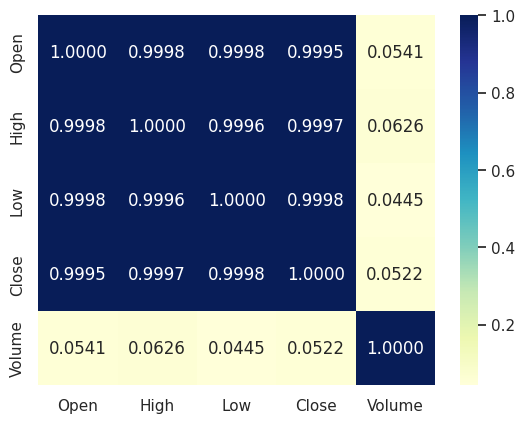

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap='YlGnBu', fmt=".4f");

Based on this data, there is an extremely high positive correlation between the open, high, low, and close prices which is very logical in the stock business since when a stock price increases or decreases in a day, it doesn't increase or decrease by a lot. It does not fluctuate a lot. In addition to that, if the stock price is at a high price, then the open, high, low, and closing price will also be high as well. Hence, there is an extremely strong correlation between the prices.

However, the correlation is not as strong between the volume and the prices. There is a slight positive correlation as the more amounts of stocks sold, the more it is of interest, and it would maintain a high cost. However, at the end of the day, volume measures the amount sold rather than the price. Volume just shows if the stock is trending, and is not usually a direct predictor of price as stocks are very volatile and can change due to many factors.

Now, we are going to graph our columns so we can see if they are following a posiitve or negative trend

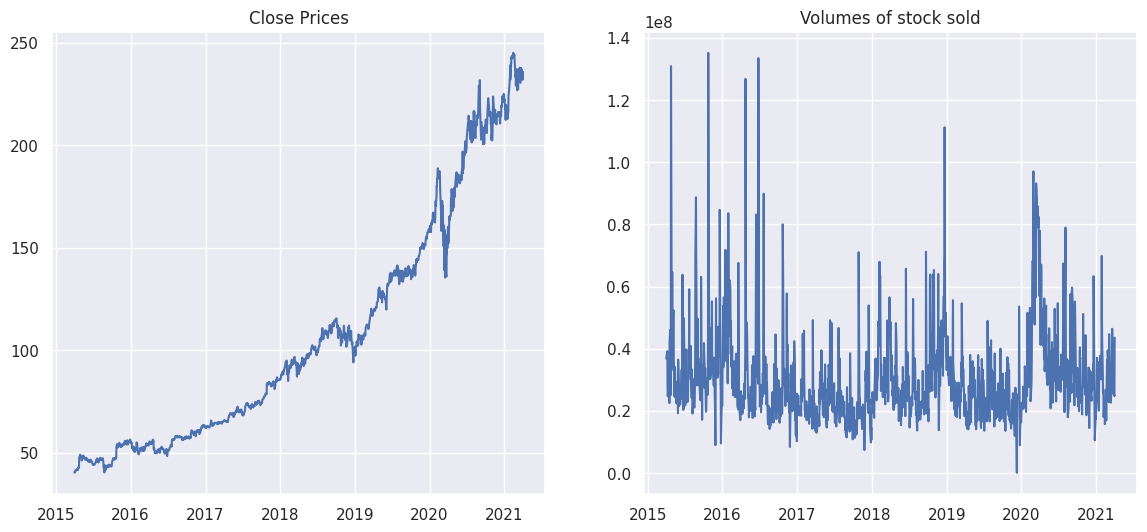

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
plt.plot(df['Date'], df['Close'])
plt.title('Close Prices')


ax = f.add_subplot(122)
plt.plot(df['Date'], df['Volume'])
plt.title('Volumes of stock sold')
plt.show()



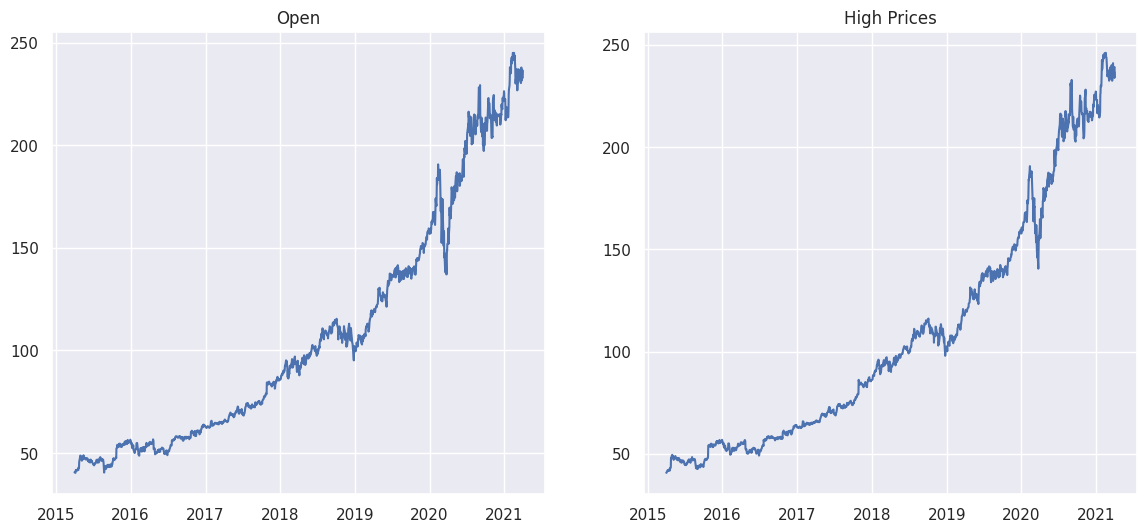

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
plt.plot(df['Date'], df['Open'])
plt.title('Open')


ax = f.add_subplot(122)
plt.plot(df['Date'], df['High'])
plt.title('High Prices')
plt.show()

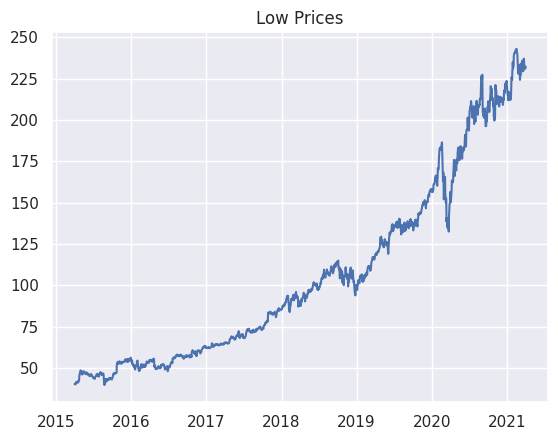

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Date'], df['Low'])
plt.title('Low Prices')
plt.show()



As seen above, all the prices follow an upward trend overall across the years. However, it has taken a hit in 2020 due to COVID. However, the volume follows no certain trend

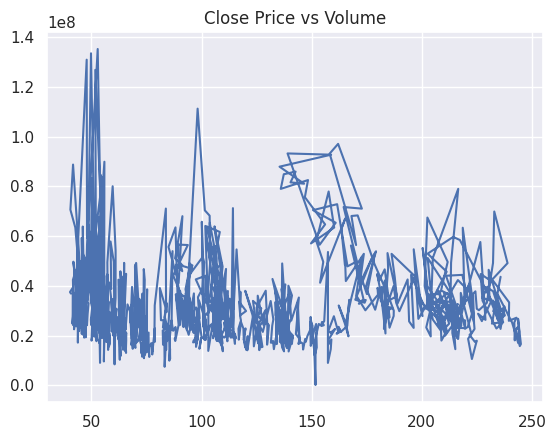

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Close'], df['Volume'])
plt.title('Close Price vs Volume')
plt.show()

The graph above goes to show that there is almost no correlation between the stock price and volume as the line keeps rising and falling rather than following a straight line

## **Third Step: Creation and Analysis of the states we want to predict**

Now, since we want to predict stock fluctuations, we will now create a new column that determines if the stock price increased, decreased or stayed the same from the day previous. After research, the best way to know that difference is to calculate the trade gap which gives the difference betweem the opening price of the new day and the closing price of the previous day. This is usually the most significant change, and what determines how the fluctuations will be like for the day. Trading gaps are usually more used in order to know flucutations across the days rather than through out the day. Hence, it is more preferred for predictions for future fluctuations

In [ ]:
df['Trading_Gap'] = df['Open']-df['Close'].shift(1)
df['Gap_Label'] = np.where(df['Trading_Gap'] > 0, 'Up',
                           np.where(df['Trading_Gap'] < 0, 'Down', 'Stable'))
df.head(10)

,Date,Open,High,Low,Close,Volume,Trading_Gap,Gap_Label
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,Stable
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.06,Down
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,0.05,Up
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,0.06,Up
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.05,Down
5,2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861,-0.17,Down
6,2015-04-10 16:00:00,41.63,41.95,41.41,41.72,28022002,0.15,Up
7,2015-04-13 16:00:00,41.40,42.06,41.39,41.76,30276692,-0.32,Down
8,2015-04-14 16:00:00,41.80,42.03,41.39,41.65,24244382,0.04,Up
9,2015-04-15 16:00:00,41.76,42.46,41.68,42.26,27343581,0.11,Up


Now, let's examine the trading gap and gap_label. Firstly, we will see the central tendency and distribution of our two new attributes

In [ ]:
df[['Trading_Gap','Gap_Label']].describe(include='all')

,Trading_Gap,Gap_Label
count,1510.000000,1511
unique,NaN,3
top,NaN,Up
freq,NaN,825
mean,0.093113,NaN
std,1.427399,NaN
min,-18.830000,NaN
25%,-0.250000,NaN
50%,0.060000,NaN
75%,0.440000,NaN


Based on the analysis of those two, the following can be seen:
1. The trading gap is also right skewed since the mean is higher than the median. This shows that most of the price changes are positive meaning that there is a positive trend overall. This might be due to inflation which causes stocks to usually increase in price
2. The most the stock price has decreased was by 18.83
3. The most the stock has increased was by 8.4
4. The standard deviation of the trading gap is 1.42
5. The upward trend can be seen as the mode for the Gap_Label was Up

Next, we will see the count and distribution of the Label_Gap

In [ ]:
df['Gap_Label'].value_counts()

,count
Gap_Label,
Up,825
Down,666
Stable,20


In [ ]:
df['Gap_Label'].value_counts()/df['Gap_Label'].size

,count
Gap_Label,
Up,0.545996
Down,0.440768
Stable,0.013236


As seen below, almost 55% of the time, the trading gap is going up, meaning that the price of the next day is usually higher than the previous day. 44% of the time, the gap is decreasing meaning that the price of the previous day was higher than the current day. Almost one percent of the time, the gap does not change, meaning that the price is stable and unchanging

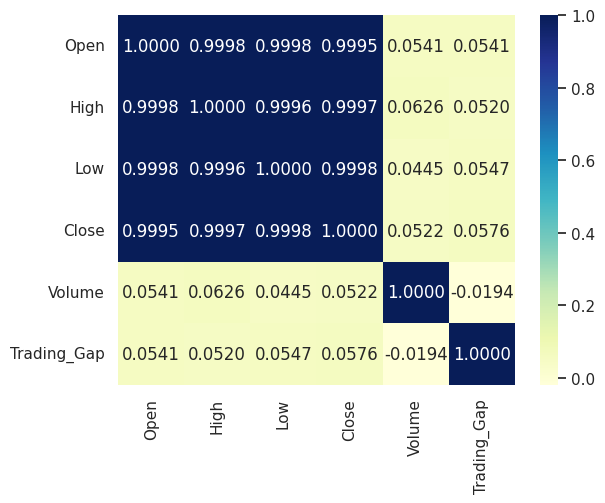

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap='YlGnBu', fmt=".4f");

There is a weak positive correlation between trading gap and stock price as an increase in prices would lead to positive difference between the opening and closing; stock prices are also affected by several other factors as well which explains the weak correlation.

Text(0, 0.5, 'Trading Gap')

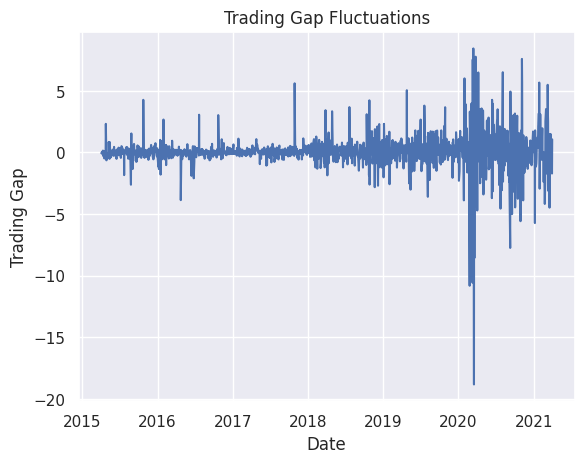

In [ ]:
plt.plot(df['Date'], df['Trading_Gap'])
plt.title('Trading Gap Fluctuations')
plt.xlabel('Date')
plt.ylabel('Trading Gap')

It is interesting to note that the fluctuations have gotten more volatile due to COVID and other events that affected the world ever since 2020 and afterwards

Next, we will illustrate the relation between trading gap and volume

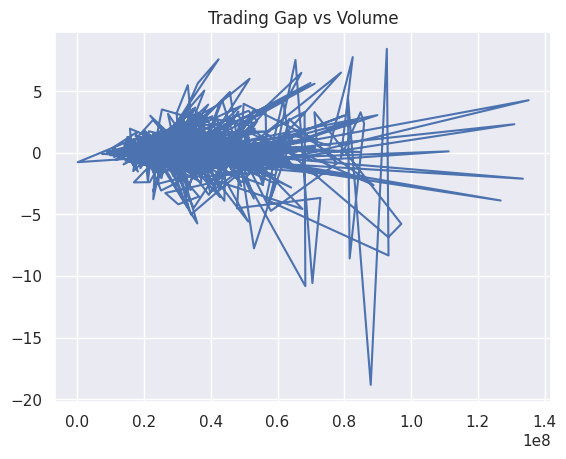

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Volume'], df['Trading_Gap'])
plt.title('Trading Gap vs Volume')
plt.show()

The graph above shows almost no correlation between volume and trading gap

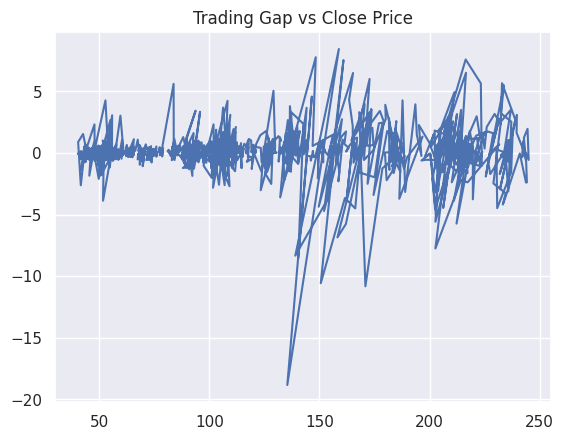

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Close'], df['Trading_Gap'])
plt.title('Trading Gap vs Close Price')
plt.show()

Based on the graph above, there is almost no correlation between closing price and trading gap as the trading gap keeps increasing then decreasing with no clear pattern regardless of the different stock prices. When the stock price was at around 150, the fluctuations had a bigger magnitude spikes and drops but that might be due to the year 2020 which was COVID year

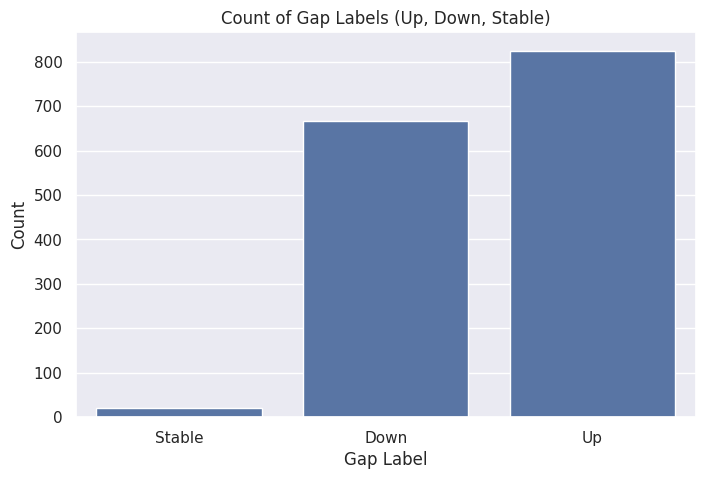

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Gap_Label', data=df)
plt.xlabel('Gap Label')
plt.ylabel('Count')
plt.title('Count of Gap Labels (Up, Down, Stable)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load Microsoft stock data (you can load your dataset)
# Assuming 'data' is a pandas DataFrame with Date, Open, High, Low, Close, Volume columns
# For this example, I will use only the 'Close' price for prediction
data = pd.read_csv('microsoft_stock.csv')  # Replace with your dataset path

# Set the Date column as index and sort the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]  # Using only the Close price

# Normalize the 'Close' price for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Number of previous days to use for predicting the next day's price
X, y = create_dataset(data_scaled, time_step)

# Reshape X to be 3D [samples, time_steps, features] as required by LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Fully connected layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict the stock prices
predicted_stock_price = model.predict(X_test)

# Inverse transform to get the predicted stock prices in original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the actual stock prices to their original scale for comparison
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, color='blue', label='Actual Microsoft Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Markov Model Building**

There are several different types of Markov Models:
1. Discrete Time Markov Chain (DTMC):
This is the default type and the type we were taught in the curriculum. All states are observable and there is usually no hidden patterns
2. Hidden Markov Model:
This is a type of Markov that works to find the probability of going from one state to the other given the output of a certain variable
3. Continous Time Markov Chain:
This estimates the transition matrix in the units of time rather than probability as it is continous; transitions can happen at any moment of time rather than after a certain interval of time
4. Markov Decision Process:
This Markov model works to model decision making models by maximizing the rewards. For instance, when pricing items, it would predict the next state based on the pricing that would maximize profit

In our case, we chose a regular Markov Chain, also known as Discrete Time Markov Chain, as we have changes that are daily meaning changes happen in a certain interval rather than at any point in time. There is also no hidden patterns in this specific dataset, so a Hidden Markov was excluded


**Attribute Selection**
Now, it is the time to create a Markov Chain so that we can predict the fluctuations of the stocks of Microsoft. We will use the Gap_Label as our input and output as we are trying to predict whether the stock price of the next day will increase or not. We will not need high or low since we do not care for fluctuations throughout the day. We care more about fluctuations across the days. In addition to that, we found no correlation between volume and trading gap; hence, we can eliminate it. Hence, we will just need the Gap-Label which is derived from the open and close prices.

We want to determine the next market fluctuations based on current market fluctuations, so our input attribute is the current Gap_Label, and our output attribute is the Gap_Label of the next day. This will be managed by using the same column but for the input (current), we will use it as it is; however, for the output attribute (next), we will Gap_Label but shift one down.

Now, we build our Markov Chain and print the transition matrix

In [ ]:
import pandas as pd
import numpy as np

# Calculate the transition probabilities
states = df['Gap_Label'].unique()
transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)

for i in range(len(df) - 1):  # Iterate until the second-to-last row
    prev_state = df['Gap_Label'].iloc[i]
    curr_state = df['Gap_Label'].iloc[i + 1]  # Shift down by referring to the next row
    transition_matrix.loc[prev_state, curr_state] += 1

# Convert counts to probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)


print("Transition Matrix:")
print(transition_matrix)



<ipython-input-91-a1b6db183e5f>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)


Transition Matrix:
          Stable      Down       Up
Stable  0.000000  0.500000  0.50000
Down    0.013514  0.456456  0.53003
Up      0.012136  0.427184  0.56068


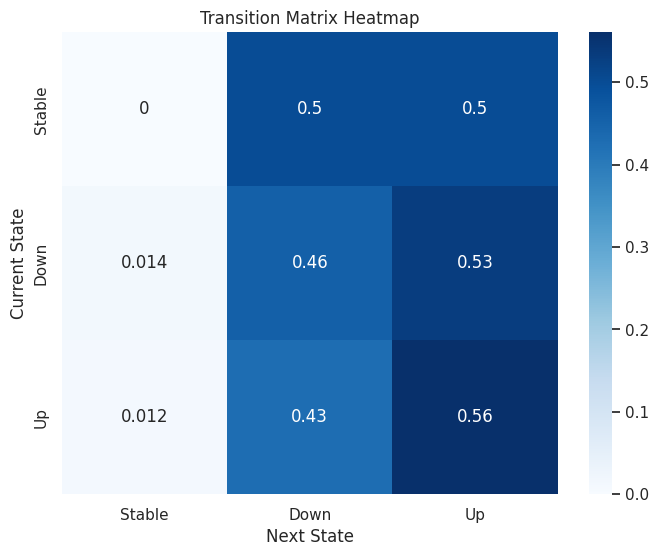

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display transition matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="Blues", cbar=True)
plt.title("Transition Matrix Heatmap")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()


In [ ]:
!pip install networkx matplotlib


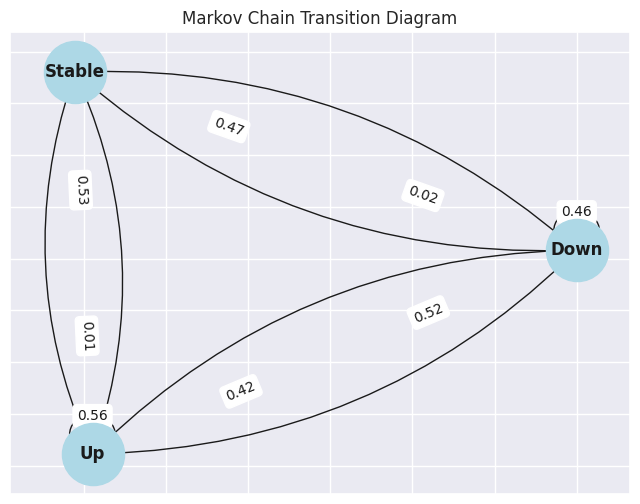

In [ ]:
plt.figure(figsize=(8, 6))

# Define layout for nodes
pos = nx.spring_layout(G, seed=42)  # Positions for nodes

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, connectionstyle="arc3,rad=0.2", arrowstyle="->", arrowsize=20)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Draw edge labels (transition probabilities)
edge_labels = {(state_from, state_to): f"{weight['weight']:.2f}"
               for state_from, state_to, weight in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)

# Show the plot
plt.title("Markov Chain Transition Diagram")
plt.show()

This transition matrix shows the following:

If the stock price is stable for a day, it is hard to tell if it will increase or decrease the next day.

It stock prices increases/ decreases, there is a strong likelihood (53%-56%) for it to increase again. However, there is also a strong chance (42%-45%) likelihood that it will decline. There is a rare probability that it will remain stable.

# **Markov Model Evaluation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming your transition matrix is set up as in your code

# Prepare test data
actual_states = df['Gap_Label'][1:].values  # Actual sequence of states
predicted_states = []

for i in range(len(df['Gap_Label']) - 1):  # Iterate up to the second-to-last row
    current_state = df['Gap_Label'].iloc[i]
    # Get the state with the highest probability in the transition matrix for `current_state`
    next_state = transition_matrix.loc[current_state].idxmax()
    predicted_states.append(next_state)

# Calculate confusion matrix
cm = confusion_matrix(actual_states, predicted_states, labels=['Up', 'Down', 'Stable'])

# Create a DataFrame for a better visualization of the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=['Up', 'Down', 'Stable'], columns=['Up', 'Down', 'Stable'])

# Display confusion matrix with TP, FP, FN, TN included in the table
print("Confusion Matrix with TP, FP, FN, TN:")
print(cm_df)

# Calculate accuracy
accuracy = accuracy_score(actual_states, predicted_states)
print("\nAccuracy:", accuracy)


Confusion Matrix with TP, FP, FN, TN:
         Up  Down  Stable
Up      815    10       0
Down    656    10       0
Stable   19     0       0

Accuracy: 0.5463576158940397


This shows that the markov model predicted that the markov chain predicted that the price will always increase, disregarding all the decreases in the market which shows that this markov model is not able to accurately predict market place decrease/stable fluctuations. This is due to a weakness in our dataset that the prices tend to have a postive trend overall; hence, the decrease in prices was severely ignored. In addition to that, there are also other factors playing into price increases including pandemics, political events, etc.. which are not included in this dataset. That is a weakness in our dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False, random_state=1)

# Train the Markov Model on the training data based on transitions from current to next state
states = train_data['Gap_Label'].unique()
transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)

for i in range(len(train_data) - 1):  # Iterate up to the second-to-last row
    current_state = train_data['Gap_Label'].iloc[i]
    next_state = train_data['Gap_Label'].iloc[i + 1]
    transition_matrix.loc[current_state, next_state] += 1

# Convert counts to probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

# Predict the next state for each entry in the test data based on the current state
actual_states = test_data['Gap_Label'].values
predicted_states = []

for i in range(len(test_data) - 1):  # Iterate up to the second-to-last row
    current_state = test_data['Gap_Label'].iloc[i]
    # Predict the next state based on the highest probability transition from `current_state`
    next_state = transition_matrix.loc[current_state].idxmax()
    predicted_states.append(next_state)

# Align lengths of actual and predicted states for accuracy calculation
accuracy = accuracy_score(actual_states[1:], predicted_states)  # Remove first entry in actual_states to match predicted

print("Accuracy:", accuracy)



<ipython-input-94-68e67a53cabd>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)


Accuracy: 0.5529801324503312


Next, we decided to evaluate our Markov Model through splitting our data to training and testing. The training creates a markov model while the testing data is used to predict the next state of the dataset based on the highest probability in the transition matrix. This had an accuracy of 55% which is 1% higher than the confusion matrix; however, this might be due to the testing data having a ratio of Up Gap Labels that increased the accuracy. Hence, in order to combat this issue, we decided to also implement K-folds cross validation in order to resolve any biases that comes with splitting data into training and testing data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Prepare your data and create the k-fold cross-validator
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=False)  # No need for random_state when shuffle is False

accuracies = []

for train_index, test_index in kf.split(df):
    # Split data into training and testing sets
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Train Markov Model on train_data using current to next state transitions
    states = train_data['Gap_Label'].unique()
    transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)

    for i in range(len(train_data) - 1):  # Iterate up to the second-to-last row
        current_state = train_data['Gap_Label'].iloc[i]
        next_state = train_data['Gap_Label'].iloc[i + 1]
        transition_matrix.loc[current_state, next_state] += 1

    # Convert counts to probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Predict the next state for each entry in test_data based on the current state
    actual_states = test_data['Gap_Label'].values
    predicted_states = []

    for i in range(len(test_data) - 1):  # Iterate up to the second-to-last row
        current_state = test_data['Gap_Label'].iloc[i]
        # Predict the next state based on the highest probability transition from `current_state`
        next_state = transition_matrix.loc[current_state].idxmax()
        predicted_states.append(next_state)

    # Align lengths of actual and predicted states for accuracy calculation
    accuracy = accuracy_score(actual_states[1:], predicted_states)  # Remove the first entry in actual_states
    accuracies.append(accuracy)

# Calculate the average accuracy over all folds
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy over {k} folds:", average_accuracy)


<ipython-input-95-c245a7fab086>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)
<ipython-input-95-c245a7fab086>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)
<ipython-input-95-c245a7fab086>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.

Average Accuracy over 5 folds: 0.5445446744846099


We used the K folds. Since the dataset had ony 1511 rows, we decided to divide them into 5 folds and created 5 rounds of training and testing. The accuracy of the k folds was 54.45% which is close to the Confusion matrix as well.

## **Conclusion:**



In this experiment, we were able to conclude that the Markov Chain produced an accuracy of 54% due to it only predicted that the stock price was always increase; it disregarded all the times that price stayed as it was or it decreased. For us, those are not satisfactory results at all.

This was due to that the data is right skewed and that is normal in finance as inflation would always lead to increase in price.

A weakness in our dataset is that there was no attribute that shows if an positive or negative event took place. Having such attribute would have helped us find a better pattern through using Hidden Markov Model.

In fact, stocks rely on all events; whether those happened in the past or in the present; hence, a markov chain might not be the best option as it does not take in mind the past given the present. Stock prices are in fact one of the hardest things to predict as prices rely on a lot of factors such as inflation, customer expectations, political events, pandemics, natural disasters, etc... Some of those factors are not able to be predicted; hence, it is not easy to predict it with high accuracy. However, integrated several of datasets that have the events of the world with the stock prices might help produce better results in the long run